In [3]:
import pandas as pd
import numpy

<h2>Загрузим датасет </h2>


In [21]:
# Загрузите ваш датасет
df = pd.read_csv('adult.data.csv')

# Выведем данные
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,NaN,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Trans,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,NaN,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,NaN,Female,0,0,40,Cuba,<=50K


<h2>Изучим датасет </h2>


In [ ]:
# Пропуски
null_values = df.isnull().sum()
print("Null в столбцах:\n", null_values)


Null в столбцах:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              4
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Тип данных в столбцах:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

Небольшая статистика по столбцам:
                  age workclass        fnlwgt education  education-num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   


<h2>Заполним пропуски </h2>


In [23]:
df_cleaned = df.dropna()

# Проверка количества пропусков после обработки
print("\nКоличество пропусков после dropna():")
print(df_cleaned.isnull().sum())


Количество пропусков после dropna():
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


<h2>Категоризируем столбец пола</h2>


In [24]:
data_coded = df_cleaned
# Кодирование категориальных признаков
data_coded['sex'], uniques = pd.factorize(data_coded['sex'])

# Вывод первых нескольких строк закодированного датасета
data_coded.head(10)

C:\Users\Volodya\AppData\Local\Temp\ipykernel_42096\3786700126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coded['sex'], uniques = pd.factorize(data_coded['sex'])


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,2,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,2,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,2,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,0,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,0,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,2,0,0,30,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,0,0,0,50,United-States,<=50K


In [30]:
uniq = df_cleaned['sex'].unique()
print(uniq)


[0 1 2]


<h2>Масштабируем данные </h2>


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


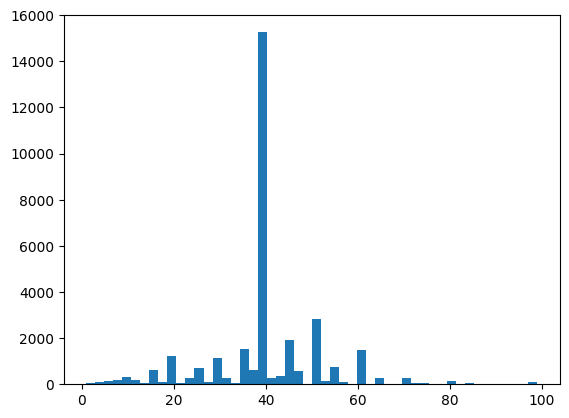

In [31]:
#Данные до масштабирования
plt.hist(df_cleaned['hours-per-week'], 50)
plt.show()

In [32]:
#MinMax масштабирование
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df_cleaned[['hours-per-week']])

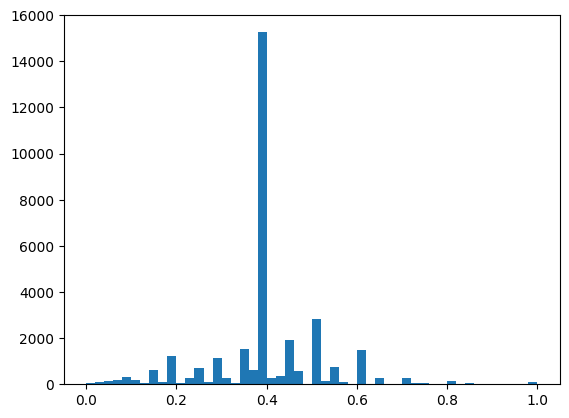

In [33]:
plt.hist(sc1_data, 50)
plt.show()

In [34]:
# Масштабирование данных на основе Z-оценки
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df_cleaned[['hours-per-week']])

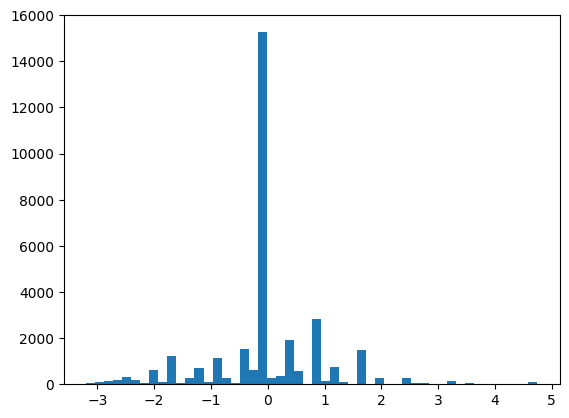

In [35]:
plt.hist(sc2_data, 50)
plt.show()
